# Molecular Dynamics
### University of California, Berkeley - Spring 2022

The goal of today’s lecture is to present Molecular Dynamics (MD) simulations of macromolecules and how to run them using Python programmming language. In this lecture, `openmm` package is used for molecular dynamics visualizations. 

The following concepts are covered in this notebooks:

* __Newton's Laws of Motion__
* __Simulation of dynamics of particles__
* __Proteins and levels of their structure__
* __Molecular Mechanics__
* __MD simulations of proteins__
* __Normal Mode Analysis with ProDy__


In [1]:
!pip install numpy --upgrade

  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.0
    Uninstalling numpy-1.19.0:
      Successfully uninstalled numpy-1.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.5 which is incompatible.
tensorflow-cpu 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.
scvi-tools 0.14.3 requires importlib-metadata<2.0,>=1.0; python_version < "3.8", but you have importlib-metadata 4.8.1 which is incompatible.
numba 0.54.0 requires numpy<1.21,>=1.17, but you have numpy 1.21.5 which is incompatible.


In [2]:
import os
os.chdir('/home/mohsen/projects/molecular-biomechanics/proteomics/')
from md1 import simulate_apple_fall, simulate_three_particles
from IPython.display import Video

## Newton's Laws of Motion

Newton's 2nd law connects the kinematics (movements) of a body with its mechanics (total force acting on it) and defines the dynamic evolution of its position: 

$$m\frac{d^2r(t)}{dt^2} = F = - \nabla{U(r)},$$

where $m$ is the mass, $r$ is the position, $F$ is the force and $U(r)$ is the potential energy, which depends only on the position of the body. 
If one knows the forces acting upon the body, one can find the position of the body at any moment $r(t)$, i.e. predict its dynamics. This can be done by solving Newton's equation of motion. It is a second order ODE that can be solved analytically for a few simple cases: constant force, harmonic oscillator, periodic force, drag force, etc.
However, a more general approach is to use computers in order to solve the ODE numerically.

---
## Simulation of Dynamics of Particles

There are [many methods](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations#Methods) for solving ODEs. The second order ODE is transformed to the system of two first order ODEs as follows:

$$\frac{dr(t)}{dt} = v(t)$$

$$m\frac{dv(t)}{dt} = F(t)$$

We use a finite difference approximation that comes to a simple forward Euler Algorithm: 

$$ v_{n+1} = v_n + \frac{F_n}{m} dt$$

$$ r_{n+1} = r_n + v_{n+1} dt$$

Here we discretize time t with time step $dt$, so $t_{n+1} = t_n + dt$, and $r_{n} = r(t_n)$, $v_{n} = v(t_n)$, where $n$ is the timestep number. Using this method, computing dynamics is straightforward.

---
### Example 3.1. Simulation of a projectile on Earth.

We want to know the dynamics of a green apple ($m = 0.3$ kg) tossed horizontally at 10 cm/s speed from the top of the Toronto CN Tower (553 m) for the first 10 seconds.

![](./media/apple_fall.jpeg)

In [2]:
simulate_apple_fall(
    total_time=10, 
    mass=0.3, 
    initial_velocity=-0.1, 
    height=553, 
    timestep=0.05,
)

In [3]:
Video('./media/apple_fall.mp4')

When a closed system of particles are interacting through pairwise potentials, the force on each particle $i$ depends on its position with respect to every other particle $j$:

$$m_i\frac{d^2r_i(t)}{dt^2} = \sum_jF_{ij}(t) = -\sum_j\nabla_i{U(|r_{ij}(t)|)}$$

where $r_{ij} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2 + (z_i - z_j)^2}$ is the distance between particle $i$ and $j$, and $i,j \in (1,N)$.

---
### Example 3.2. Simulation of 3-body problem with Hooke's law:

We want to know the dynamics of 3 particles $m = 1$ kg connected to each other with invisible springs with $K_s = 5$ N/m, and $r_0 = 1$ m initially located at (0, 2), (2, 0) and (-1, 0) on the 2D plane for the first 10 seconds of their motion.

**Hint:**
The pairwise potential is (Hooke's Law): $$U(r_{ij}) = \frac{K_s}{2}(r_{ij} - r_0)^2$$

The negative gradient of the potential is a force from $j$-th upon $i$-th: 

$$\mathbf{F_{ij}} = - \nabla_i{U(r_{ij})} = - K_s (r_{ij} - r_0) \nabla_i r_{ij} = - K_s (r_{ij} - r_0) \frac{\mathbf{r_{ij}}}{|r_{ij}|}$$


In [4]:
simulate_three_particles(
    total_time=26, mass=1.0, ks=5, r0=1.0, timestep=0.05
)

In [5]:
Video('./media/3particles.mp4')

---
## Proteins, structure and functions 

<img src="./media/protein_structure.png" width="400" align="right">

While we now have a basic knowledge of the purpose and methodology of simulations, we still need to understand what proteins are and why they are important.

[Protein structure](https://en.wikipedia.org/wiki/Protein_structure) is the three-dimensional arrangement of atoms in a protein, which is a chain of amino acids. Proteins are polymers – specifically polypeptides – formed from sequences of 20 types of amino acids, the monomers of the polymer. A single amino acid monomer may also be called a residue, indicating a repeating unit of a polymer. To be able to perform their biological function, proteins fold into one or more specific spatial conformations driven by a number of non-covalent interactions such as:

- hydrogen bonding 
- ionic interactions 
- Van der Waals forces
- hydrophobic packing 

To understand the functions of proteins at a molecular level, it is often necessary to determine their three-dimensional structure using techniques such as X-ray crystallography, NMR spectroscopy, and others.

### 4.1 Levels of structure:

**Primary structure** of a protein refers to the sequence of amino acids in the polypeptide chain.

**Secondary structure** refers to highly regular local sub-structures of the actual polypeptide backbone chain. There are two main types of secondary structure: the α-helix and the β-strand or β-sheets.

**Tertiary structure** refers to the three-dimensional structure of monomeric and multimeric protein molecules. The α-helixes and β-sheets are folded into a compact globular structure. 

**Quaternary structure** is the three-dimensional structure consisting of two or more individual polypeptide chains (subunits) that operate as a single functional unit (multimer).


### 4.2 Functions:

- *Antibodies* - bind to specific foreign particles, ex: IgG 
- *Enzymes* - speed up chemical reactions, ex: Lysozyme
- *Messengers* - transmit signals, ex: Growth hormone 
- *Structural components* - support for cells, ex: Tubulin
- *Transport/storage* - bind and carry small molecules, ex: Hemoglobin


**Lysozyme** is a protein-enzyme (found in tears, saliva, mucus and egg white) that is a part of the innate immune system with antimicrobial activity characterized by the ability to damage the cell wall of bacteria. Bacteria have polysaccharides (sugars) in their cell wall, that bind to the groove, and lysozyme cuts the bond and destroys bacteria.  

<!-- |  ![](pics/LysozymeSequence.png) | ![Protein Structure](pics/LysozymeStructure.gif) | ![Protein Strucure with Sugar](pics/LysozymeRock.gif) |
|:-:|:-:|:-:|
|  Sequence | Structure | Function  |

Figure credit: [C.Ing](https://github.com/cing/HackingStructBiolTalk) and [wikipedia](https://en.wikipedia.org/wiki/Protein_structure) -->

---
## Molecular Mechanics

Since we now know what proteins are and why these molecular machines are important, we consider the method to model them. The basic idea is to create the same kind of approach as we used in the 3-body simulation. Now, our system consists of thousands particles (atoms of the protein plus atoms of surrounding water) and they all are connected via a complex potential energy function.

An all-atom potential energy function $V$ is usually given by the sum of the bonded terms ($V_b$) and non-bonded terms ($V_{nb}$), i.e.

$$V = V_{b} + V_{nb},$$

where the bonded potential includes the harmonic (covalent) bond part, the harmonic angle and
the two types of torsion (dihedral) angles: proper and improper. As it can be seen, these functions are mostly harmonic potentials 

$$V_{b} = \sum_{bonds}\frac{1}{2}K_b(b-b_0)^2 + \sum_{angles}K_{\theta}(\theta-\theta_0)^2 + \sum_{dihedrals}K_{\phi}(1-cos(n\phi - \phi_0)) + \sum_{impropers}K_{\psi}(\psi-\psi_0)^2$$

For example, $b$ and $\theta$ represent the distance between two atoms and the angle between two
adjacent bonds; $\phi$ and $\psi$ are dihedral (torsion) angles. These can be evaluated for all the
atoms from their current positions. Also, $K_b$, $K_\theta$, $K_\phi$, and $K_\psi$ are the spring constants, associated
with bond vibrations, bending of bond angles, and conformational fluctuations in dihedral and
improper angles around some equilibrium values $b_0$, $\theta_0$, $\phi_0$, and $\psi_0$, respectively. 

The non-bonded part of the potential energy function is represented by the electrostatic and van der Waals potentials, i.e.

$$V_{nb} = \sum_{i,j}\left(\frac{q_{i}q_{j}}{4\pi\varepsilon_{0}\varepsilon r_{ij}} + \varepsilon_{ij}\left[\left(\frac{\sigma^{min}_{ij}}{r_{ij}}\right)^{12}-2\left(\frac{\sigma^{min}_{ij}}{r_{ij}}\right)^{6}\right]\right)$$

where $r_{ij}$ is the distance between two interacting atoms, $q_i$ and $q_j$ are their electric charges; $\varepsilon$ and
$\varepsilon_0$ are electric and dielectric constant; $\varepsilon_{ij} = \sqrt{\varepsilon_i\varepsilon_j}$ and
$\sigma_{ij} = \frac{\sigma_i + \sigma_j}{2}$ are van der Waals parameters for atoms $i$ and $j$.

**Importantly, each force field has its own set of parameters, which are different for different types of atoms.**

![](media/ff.png)


---
## Molecular dynamics of proteins <a id='l_md'></a>

[**Molecular dynamics (MD)**](https://en.wikipedia.org/wiki/Molecular_dynamics) is a computer simulation method for studying the physical movements of atoms and molecules, i.e. their dynamical evolution. 

In the most common version, the trajectories of atoms and molecules are determined by numerically solving Newton's equations of motion for a system of interacting particles, where forces between the particles and their potential energies are often calculated using  molecular mechanics force fields. 



Now with all that intellectual equipment, we can start running legit Molecular Dynamics simulations. All we need is an initial structure of the protein and software that computes its dynamics efficiently.

### Procedure

1. Load initial coordinates of protein atoms (from *.pdb file)
2. Choose force field parameters (in potential function V from section 5).
3. Choose parameters of the experiment: temperature, pressure, box size, solvation, boundary conditions
4. Choose integrator, i.e. algorithm for solving equation of motion
5. Run simulation, save coordinates time to time (to *.dcd file).
6. Visualize the trajectory
7. Perform the analysis

__NOTE__: It is better for students to gain a little understanding of how the following packages are working under the hood before continuing the notebook.

* __NGLViewer__: NGL Viewer is a collection of tools for web-based molecular graphics. WebGL is employed to display molecules like proteins and DNA/RNA with a variety of representations.

* __MDAnalysis__: MDAnalysis is an object-oriented Python library to analyze trajectories from molecular dynamics (MD) simulations in many popular formats. It can write most of these formats, too, together with atom selections suitable for visualization or native analysis tools.

* __Openmm__: Openmm consists of two parts: One is a set of libraries that lets programmers easily add molecular simulation features to their programs and the other parts is an “application layer” that exposes those features to end users who just want to run simulations

In [3]:
pdb_file = 'data/villin_water.pdb'
# pdb_file = 'data/polyALA.pdb'
# pdb_file = 'data/polyGLY.pdb'
# pdb_file = 'data/polyGV.pdb'

In [4]:
file0 = open(pdb_file, 'r')
counter = 0
for line in file0:
    if counter < 10:
        print(line)
    counter += 1

REMARK    GENERATED BY TRJCONV

HEADER    Villin N68H in explicit water

REMARK    THIS IS A SIMULATION BOX

CRYST1   49.163   45.981   38.869  90.00  90.00  90.00 P 1           1

MODEL        0

ATOM      1  N   LEU     1      25.160  14.160  19.440  1.00  0.00

ATOM      2  H1  LEU     1      24.350  13.730  19.870  1.00  0.00

ATOM      3  H2  LEU     1      25.980  13.680  19.760  1.00  0.00

ATOM      4  H3  LEU     1      25.180  15.100  19.810  1.00  0.00

ATOM      5  CA  LEU     1      25.090  13.920  17.980  1.00  0.00



In [5]:
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
import MDAnalysis as md
from MDAnalysis.tests import datafiles
import nglview as ng
from sys import stdout

u = md.Universe(datafiles.PSF, datafiles.DCD)
view = ng.show_mdanalysis(u, gui=True)
view

NGLWidget(max_frame=97)

---
### Example: MD simulation of protein folding into alpha-helix 

Run a simulation of fully extended polyalanine __polyALA.pdb__ for 400 picoseconds in a vacuo environment with T=300 K and see if it can fold to any secondary structure:

In [6]:
### 1.loading initial coordinates
pdb_file = "data/polyGV.pdb"
pdb = PDBFile(pdb_file) 

### 2.choosing a forcefield parameters
ff = ForceField('amber10.xml')  
system = ff.createSystem(pdb.topology, nonbondedMethod=CutoffNonPeriodic)

### 3. Choose parameters of the experiment: temperature, pressure, box size, solvation, boundary conditions, etc
temperature = 300*kelvin
frictionCoeff = 1/picosecond
time_step = 0.002*picoseconds
total_steps = 400*picoseconds / time_step

### 4. Choose an algorithm (integrator)
integrator = LangevinIntegrator(temperature, frictionCoeff, time_step)

### 5. Run simulation, saving coordinates time to time:

### 5a. Create a simulation object
simulation = Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

### 5b. Minimize energy
simulation.minimizeEnergy()

### 5c. Save coordinates to dcd file and energies to a standard output console:
simulation.reporters.append(DCDReporter('data/polyALA_traj.dcd', 1000))
simulation.reporters.append(StateDataReporter(stdout, 5000, step=True, potentialEnergy=True,\
                                              temperature=True, progress=True, totalSteps = total_steps))

### 5d. Run!
simulation.step(total_steps)

#"Progress (%)","Step","Potential Energy (kJ/mole)","Temperature (K)"
2.5%,5000,3876.571533203125,304.28672581007845
5.0%,10000,3729.46630859375,292.3798016646088
7.5%,15000,3786.146240234375,292.0574921399869
10.0%,20000,3685.5322265625,304.682162004977
12.5%,25000,3726.85791015625,295.5986890371652
15.0%,30000,3599.71435546875,305.7709539552684
17.5%,35000,3557.91015625,272.95099562053093
20.0%,40000,3505.79296875,299.0994735978005
22.5%,45000,3512.466796875,297.5766468598965
25.0%,50000,3579.800048828125,307.2676715516219
27.5%,55000,3312.2177734375,320.0279313461482
30.0%,60000,3446.26171875,283.91535040734703
32.5%,65000,3343.086181640625,289.3558079571391
35.0%,70000,3370.997802734375,291.9968637794384
37.5%,75000,3421.008544921875,303.6467241083674
40.0%,80000,3419.22900390625,300.12584428748863
42.5%,85000,3504.77783203125,319.47432688660336
45.0%,90000,3341.38232421875,297.0140781407973
47.5%,95000,3333.06591796875,277.48041923212844
50.0%,100000,3440.62744140625,305.498656492

In [7]:
### 6. Visualization
sys = md.Universe(pdb_file, 'data/polyALA_traj.dcd')
ng.show_mdanalysis(sys, gui=False)

NGLWidget(max_frame=199)

## [ProDy](http://prody.csb.pitt.edu/)

### Introduction

ProDy is a free and open-source Python package for protein structural dynamics analysis. It is designed as a flexible and responsive API suitable for interactive usage and application development.

### Structure analysis
ProDy has fast and flexible PDB and DCD file parsers, and powerful and customizable atom selections for contact identification, structure comparisons, and rapid implementation of new methods.

### Dynamics analysis
In this lecture, we are going to use ProDy for Normal Mode Analysis (NMA) which can be performed using 

* Anisotropic network model (ANM)
* Gaussian network model (GNM)
* ANM/GNM with distance and property dependent force constants

Here, we will use Ubiquitin to perform Gaussian network model a.k.a. GNM.

It's worth mentioning that dynamics from experimental datasets, theoretical models and simulations can be visualized using [NMWiz](http://prody.csb.pitt.edu/nmwiz/). Normal Mode Wizard (NMWiz) is a VMD plugin designed for visual comparative analysis of normal mode data, i.e. modes may come from principal component, essential dynamics, normal mode analysis or may be any vector describing a molecular motion.


### Installation
You can install `ProDy` package using the following command in your terminal:

```bash
pip install prody
```

### Getting Started
Ok great! Now let's start using `ProDy` :)
To start using ProDy and turn this notebook's interactive mode on, Please run the following cell. This will import everything from ProDy package and enables the interactive mode.

In [1]:
from prody import *
from pylab import *

ion() # turns interactive mode on

### Gaussian Network Model (GNM) Analysis with ProDy

This example shows how to perform GNM calculations using an X-ray structure of `ubiquitin`. `Ubiquitin` is a small, 76-amino acid, regulatory protein that was discovered in 1975. It's present in all eukaryotic cells, directing the movement of important proteins in the cell, participating in both the synthesis of new proteins and the destruction of defective proteins.

A GNM instance that stores the Kirchhoff matrix and normal mode data describing the intrinsic dynamics of the protein structure will be obtained. GNM instances and individual normal modes (Mode) can be used as input to functions in ```prody.dynamics``` module.

We'll go through the analysis step by step. 

### 1. Parsing PDB file
Ok, let's parse the protein's PDB structure file with `ProDy`. This can be done using `parsePDB()` function from `ProDy`. The function will accept an identifier as the PDB ID. If the PDB file with the given ID exists in the local directory, it will load the file locally. Otherwise, the PDB file will be downloaded automatically.

![Ubiquitin 3D structure](./media/Ubiquitin.png)

Reference: https://proteopedia.org/wiki/index.php/Image:Lysubq.png

In [2]:
ubiquitin = parsePDB('1aar')

@> PDB file is found in working directory (1aar.pdb.gz).
@> 1218 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [3]:
ubiquitin

<AtomGroup: 1aar (1218 atoms)>

This file contains 2 chains, and a flexible C-terminal (residues 71-76). We only want to use Cα atoms of first 70 residues from chain A, so we select them:

In [4]:
c_alphas = ubiquitin.select('calpha and chain A and resnum < 71')

In [5]:
c_alphas

<Selection: 'calpha and chai...and resnum < 71' from 1aar (70 atoms)>

A comprehensive documentation of atom selection is provided by `ProDy` in this [link](http://prody.csb.pitt.edu/manual/reference/atomic/select.html#selections). You can learn more about the selection in the mentioned webpage. 

As an example which can be useful to know here, __Cα__ is the central point in the backbone of every amino acid. The alpha carbon (α-carbon or Cα) is what connects the amino group to the acid carboxyl group, giving amino acids their name. The alpha carbon also serves as the point of attachment for the sidechains of 19 out of 20 amino acids used in protein building.

![](./media/calpha.png)

Figure Reference: https://static.wikia.nocookie.net/foldit/images/e/ea/Backbone_overview_group.stickpolarh.png/revision/latest?cb=20180103000343

### Build Kirchhoff Matrix
First, Let's create a `GNM` object. 

In [6]:
gnm = GNM(name='Ubiquitin')

In [7]:
gnm

<GNM: Ubiquitin (0 modes; 0 nodes)>

We can build Kirchhoff matrix using selected atoms and `gnm.buildKirchhoff()` method. The method accepts the coordinates as the first arguments. It also accepts two additonal parameters named `cutoff` as the cutoff distance for pairwise interactions and `gamma` as spring constant. You can leave the parameters with their default values and move on. 

In [8]:
gnm.buildKirchhoff(coords=c_alphas, cutoff=10.0, gamma=1.0)

@> Kirchhoff was built in 0.01s.


Now the Kirchhoff matrix is built, we can get a copy of it using `gnm.getKirchhoff()` method.

In [9]:
k_matrix = gnm.getKirchhoff()

In [10]:
k_matrix

array([[11., -1., -1., ...,  0.,  0.,  0.],
       [-1., 15., -1., ...,  0.,  0.,  0.],
       [-1., -1., 20., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 20., -1., -1.],
       [ 0.,  0.,  0., ..., -1., 21., -1.],
       [ 0.,  0.,  0., ..., -1., -1., 12.]])

__NOTE__: If you have already calculated the Kirchhoff matrix and want to set it manually, you can use `gnm.setKirchhoff()` method.

### It's time to calculate the normal modes! :)
Now that we have the Kirchhoff matrix, Calculating the normal modes can be done simply by using `gnm.calcModes()` method.

Note that by default 20 non-zero (or non-trivial) modes and 1 trivial mode are calculated. Trivial modes are not retained. To calculate different numbers of non-zero modes or to keep zero modes, you can modify `n_modes` and `zeros` parameters of the function e.g. try `gnm.calcModes(50, zeros=True)`. You can set `Turbo` parameter tu `True` if you want to calculate the modes faster. It's also set by default to `True`.

In [11]:
gnm.calcModes(n_modes=20, zeros=False, turbo=True)

@> 20 modes were calculated in 0.00s.


Ok. The modes are ready. You can get the results the following functions: 

* `gnm.getEigvals()`: Get Eigenvalues
* `gnm.getEigvecs()`: Get Eigenvectors
* `gnm.getCovariance()`: Get Covariance matrix. Note that covariance matrices are calculated using the available modes in the model, which is the slowest 20 modes in this case. If the user calculates `M` modes, these `M` modes will be used in calculating the covariance matrix.

In [12]:
gnm.getEigvals()

array([ 2.50159996,  2.81198884,  4.36615755,  5.04996398,  7.18368407,
        7.64988589,  7.87722993,  9.08034538,  9.71281297, 10.13238988,
       10.50197833, 10.64403971, 10.88838721, 11.15731079, 11.2850227 ,
       11.63219978, 11.7801197 , 11.93585376, 12.00584891, 12.2183852 ])

In [13]:
gnm.getEigvals().shape

(20,)

In [14]:
gnm.getEigvecs()

array([[-6.38051740e-02, -1.30544492e-01, -2.45334248e-01, ...,
        -2.56196713e-01,  5.37771418e-01, -1.08369816e-04],
       [-7.25770215e-02, -8.45109261e-02, -1.90052460e-01, ...,
         6.24201652e-03, -6.93922518e-02,  3.22234776e-02],
       [-7.58827175e-02, -4.30040725e-02, -1.34783179e-01, ...,
         1.66397155e-02, -4.70341843e-02,  1.77800008e-02],
       ...,
       [-9.21438212e-02,  6.36544251e-02,  1.04633107e-01, ...,
         3.21057282e-02, -4.19619569e-02,  6.20810516e-03],
       [-7.00439044e-02,  9.90390676e-02,  5.42931923e-02, ...,
         3.08618840e-02,  2.37876216e-02, -1.36026733e-02],
       [-8.08918894e-02,  1.34634053e-01,  1.24148042e-01, ...,
         1.25198059e-02, -3.99479375e-02, -1.84106396e-02]])

In [15]:
gnm.getEigvecs().shape

(70, 20)

In [16]:
gnm.getCovariance()

array([[ 0.08038538,  0.0214721 ,  0.01154276, ..., -0.00810262,
        -0.0068922 , -0.00519627],
       [ 0.0214721 ,  0.01841361,  0.01294682, ..., -0.00164253,
        -0.0030955 , -0.00590236],
       [ 0.01154276,  0.01294682,  0.01015144, ...,  0.00079905,
        -0.00034443, -0.00350823],
       ...,
       [-0.00810262, -0.00164253,  0.00079905, ...,  0.01120008,
         0.00810447,  0.01423867],
       [-0.0068922 , -0.0030955 , -0.00034443, ...,  0.00810447,
         0.00920142,  0.01602405],
       [-0.00519627, -0.00590236, -0.00350823, ...,  0.01423867,
         0.01602405,  0.05269755]])

In [17]:
gnm.getCovariance().shape

(70, 70)

In order to access to each single mode, you can index `gnm` object. Normal mode indices start from 0, so slowest mode has index 0.

In [18]:
slowest_mode = gnm[0]

In [19]:
slowest_mode.getEigval()

2.501599959963146

In [20]:
slowest_mode.getEigvec()

array([-0.06380517, -0.07257702, -0.07588272, -0.11243047, -0.09221726,
       -0.14296277, -0.16396628, -0.2053729 , -0.24020989, -0.3134546 ,
       -0.19166723, -0.15241052, -0.0657869 , -0.07000933, -0.0253338 ,
       -0.03129034,  0.0007266 , -0.0058239 , -0.01543903,  0.02655975,
        0.04238382,  0.05465168,  0.06268858,  0.08997896,  0.08987359,
        0.06877047,  0.13222327,  0.1748625 ,  0.14497343,  0.12132971,
        0.19509205,  0.21771503,  0.15807374,  0.21746306,  0.24530097,
        0.21361762,  0.22544686,  0.1707908 ,  0.1998145 ,  0.15089032,
        0.10228462,  0.04310205, -0.028911  , -0.06447926, -0.0721635 ,
       -0.08602533, -0.09012947, -0.07761776, -0.05653068, -0.01097932,
        0.0162001 ,  0.06091741,  0.05773185,  0.04274781,  0.02903195,
        0.01313377,  0.00376044,  0.01133737, -0.01299074, -0.03725209,
       -0.05023782, -0.05862394, -0.07037726, -0.0936061 , -0.09401438,
       -0.09896954, -0.09684669, -0.09214382, -0.0700439 , -0.08

### Hinge sites
Hinge sites identified from all calculated modes. You can identify them using the global `calcHinges()` function. This function accepts `gnm` object as the first argument.

In [21]:
hinges = calcHinges(modes=gnm)

In [22]:
len(hinges)

64

In [23]:
hinges[:20]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21]

### Short question! Calculate the hinges of the slowest mode

In [24]:
### YOUR CODE GOES HERE

These numbers correspond to node indices in the `gnm` object, which does not know anything about the original atoms. In order to get the residue numbers corresponding to these hinges, we can index the resum array with the hinges list as follows:

In [25]:
# 1. get a copy of residue numbers
resnums = c_alphas.getResnums() 

In [26]:
# 2. calculate hinge site of the mode of interest (here we used the 2nd mode)
mode2_hinges = calcHinges(gnm[1])

In [27]:
# 3. get residue numbers corresponding these hinges
resnums[mode2_hinges]

array([ 4, 15, 26, 44, 47, 48, 49, 66])

### Visualization!
All of the `ProDy` visualization functions are prefixed with __`show...()`__. Let’s use some of them to plot data:

#### Contact Map

(<matplotlib.image.AxesImage at 0x7fec8342d4d0>,
 [],
 [])

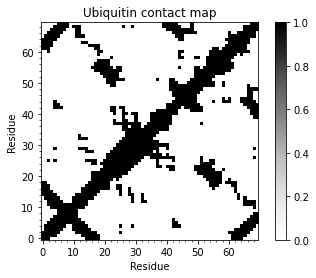

In [28]:
showContactMap(gnm)

#### Cross Correlations

(<matplotlib.image.AxesImage at 0x7fec7eaf9f90>,
 [],
 [])

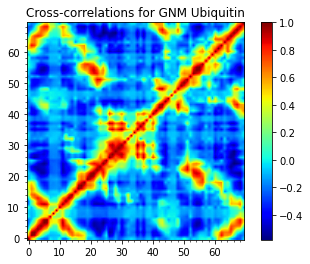

In [29]:
showCrossCorr(gnm)

#### Slow mode shape
By default, hinge sites will be shown in `mode shape plot` indicated by __red__ stars, and it can be turned off by setting `hinges=False`. The option `zero=True` is to turn on the reference line of zero.

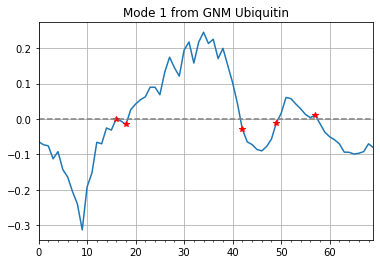

In [30]:
showMode(slowest_mode, hinges=True, zero=True)
grid()

#### Square fluctuations

[([<matplotlib.lines.Line2D at 0x7fec7d049c50>], [], [], [])]

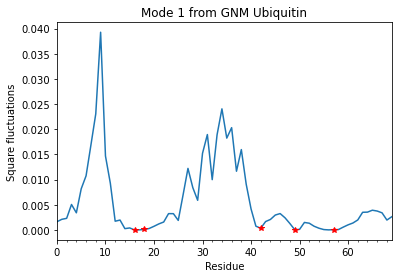

In [31]:
showSqFlucts(slowest_mode, hinges=True)

#### Protein structure bipartition
Given a GNM mode, protein structure can be partitioned into two parts that move with respect to each other. The function `showProtein()` can take a __GNM mode__ as input and visualize the bipartition.

/home/mohsen/miniconda3/envs/venv/lib/python3.7/site-packages/prody/proteins/functions.py:265: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  show = Axes3D(cf)


<Axes3D:xlabel='x', ylabel='y'>

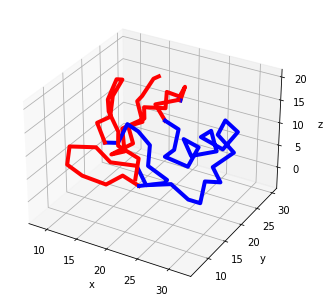

In [35]:
showProtein(c_alphas, mode=gnm[0])

## Congrats!

The notebook is available at https://github.com/Naghipourfar/molecular-biomechanics/